In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
df = pd.read_excel("../데이터자료/Join_data.xlsx", index_col = 0)    
df = df.set_index("DateTime")

# 대비 계산
df['대비_irs_1Y'] = df['1Y_Mid_irs'] - df['1Y_Mid_irs'].shift(1) 
df['대비_irs_2Y'] = df['2Y_Mid_irs'] - df['2Y_Mid_irs'].shift(1) 
df['대비_irs_3Y'] = df['3Y_Mid_irs'] - df['3Y_Mid_irs'].shift(1) 
df['대비_irs_5Y'] = df['5Y_Mid_irs'] - df['5Y_Mid_irs'].shift(1) 
df['대비_irs_10Y'] = df['10Y_Mid_irs'] - df['10Y_Mid_irs'].shift(1) 

df['대비_crs_1Y'] = df['1Y_Mid_crs'] - df['1Y_Mid_crs'].shift(1)
df['대비_crs_2Y'] = df['2Y_Mid_crs'] - df['2Y_Mid_crs'].shift(1)
df['대비_crs_3Y'] = df['3Y_Mid_crs'] - df['3Y_Mid_crs'].shift(1)
df['대비_crs_5Y'] = df['5Y_Mid_crs'] - df['5Y_Mid_crs'].shift(1)
df['대비_crs_10Y'] = df['10Y_Mid_crs'] - df['10Y_Mid_crs'].shift(1)

df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['대비_ndf'] = df['Mid_ndf']-df['Mid_ndf'].shift(1)
df['스왑포인트_1M'] = df["M1_스왑포인트"]/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex', '종가_NDF_차이' ]] 

# 결측치 제거
df_1 = df_1.dropna()                        

In [2]:
# import matplotlib.pyplot as plt
# import seaborn as sns   
# import scipy as sp  
# from matplotlib import rc 
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# plt.figure(figsize=(20,20))

# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [3]:
df_1.columns

Index(['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
       '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
       '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y',
       '대비_swapbasis_5Y', '대비_swapbasis_10Y', '대비_국고_1Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_국고_10Y', '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M',
       '전일종가_ex', '종가_ex', '종가_NDF_차이'],
      dtype='object')

In [4]:
x = df_1[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
        '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
        '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
        '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M',
        '전일종가_ex']]
y = df_1["종가_ex"]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

,대비_irs_1Y,대비_irs_2Y,대비_irs_3Y,대비_irs_5Y,대비_irs_10Y,대비_crs_1Y,대비_crs_2Y,대비_crs_3Y,대비_crs_5Y,대비_crs_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,대비_ndf,스왑포인트_1M,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-02,-0.847862,-1.217081,-0.935854,-1.045679,-1.009126,-0.205655,0.707360,0.905480,0.926463,0.826282,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.625160,0.293727,1.909409,-0.149841
2012-08-03,-0.847862,-0.731532,-0.562378,-0.628002,-0.403231,-0.205655,-0.364505,-0.463176,-1.872849,-3.115790,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.125723,0.686290,1.818881,-0.056232
2012-08-06,0.560374,0.482340,0.371312,0.416191,0.202663,-0.003373,-0.602697,-0.691285,-0.939745,-0.833538,0.563566,0.160261,0.000879,0.000209,0.107465,0.123996,-1.669093,1.818881,-0.000426
2012-08-07,0.278727,-0.003209,-0.002164,0.207352,0.404628,0.401191,0.350072,-0.006957,-1.639573,-1.663448,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.125723,0.075636,1.909409,-0.104837
2012-08-08,0.278727,0.482340,0.371312,0.416191,0.606592,0.198909,-0.007216,-0.006957,-0.473193,-0.833538,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.125723,0.206490,1.818881,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129510,-1.945404,-1.309330,-1.881032,-2.220914,-1.621628,-2.150945,-1.603722,-2.572677,-2.285880,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.625160,0.572883,-0.896960,3.207485
2022-07-26,-0.284568,-0.488757,-0.562378,-0.628002,-0.605196,0.198909,-0.721793,-0.691285,-0.473193,-0.418583,0.563566,-0.485246,-0.539435,-0.770625,0.107465,-0.000863,0.189043,-0.987488,3.220086
2022-07-27,-0.284568,-1.217081,-1.122592,-1.254517,-1.211091,0.198909,-0.245409,-0.235067,-0.239917,-0.211106,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,-0.125723,-0.098837,-0.851696,3.110275


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

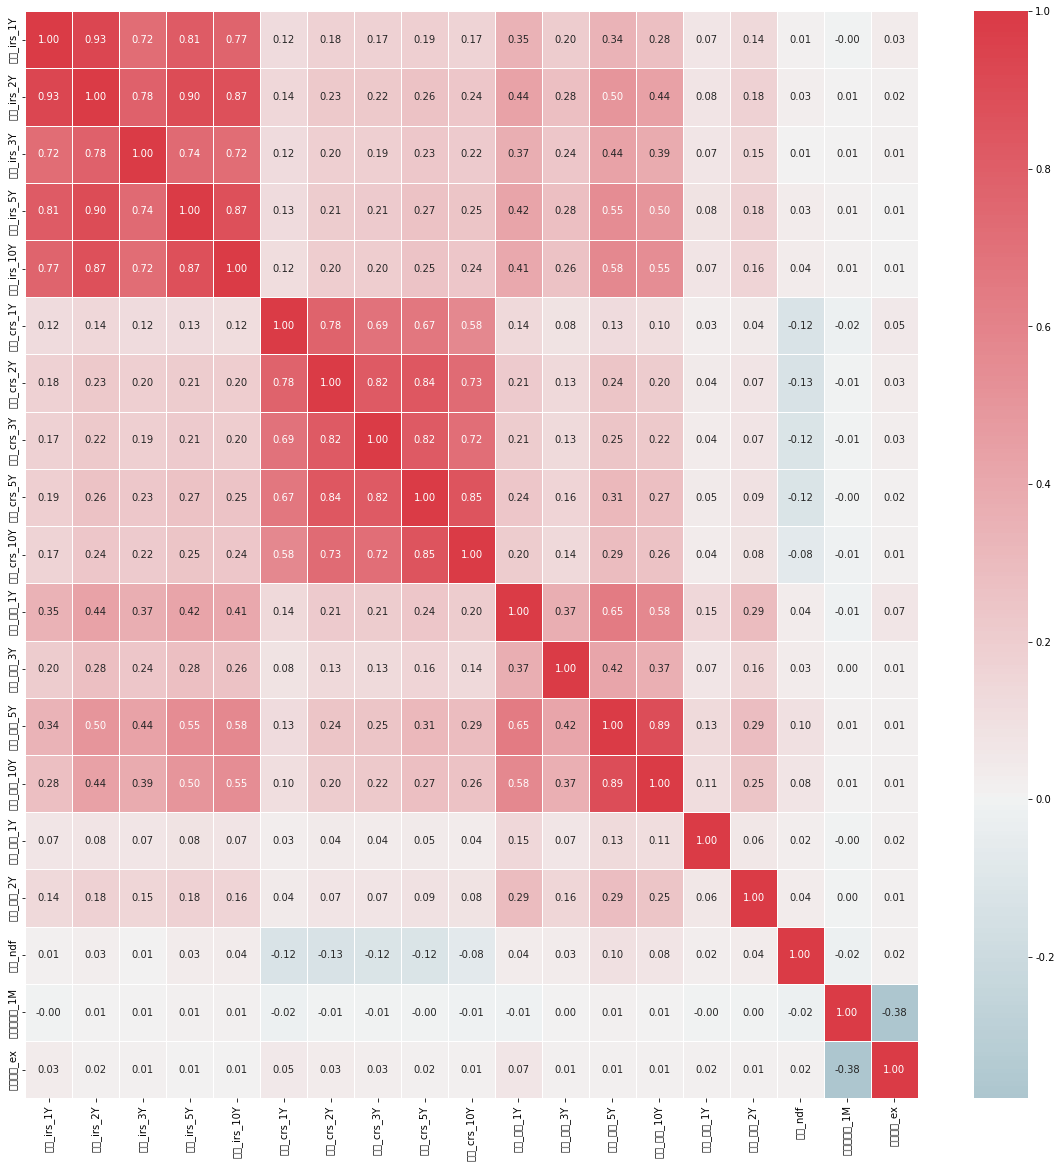

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.960226   대비_irs_1Y
1    19.503122   대비_irs_2Y
2     2.663861   대비_irs_3Y
3     6.469424   대비_irs_5Y
4     5.882081  대비_irs_10Y
5     2.652191   대비_crs_1Y
6     5.273739   대비_crs_2Y
7     3.831049   대비_crs_3Y
8     6.710155   대비_crs_5Y
9     3.722372  대비_crs_10Y
10    1.926964    대비_국고_1Y
11    1.253541    대비_국고_3Y
12    6.299485    대비_국고_5Y
13    5.056912   대비_국고_10Y
14    1.025509    대비_통안_1Y
15    1.115943    대비_통안_2Y
16    1.043867      대비_ndf
17    1.169229    스왑포인트_1M
18    1.182050     전일종가_ex


In [7]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.639e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:14:59   Log-Likelihood:                -7399.9
No. Observations:                2459   AIC:                         1.484e+04
Df Residuals:                    2439   BIC:                         1.496e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.1549      0.313      0.494      0.621      -0.460       0.770
대비_irs_2Y      0.4612      0.439      1.051      0.293      -0.399       1.321
대비_irs_3Y      0.0975      0.162      0.602      0.548      -0.220       0.415
대비_irs_5Y     -0.3035      0.253     -1.201      0.230      -0.799       0.192
대비_irs_10Y    -0.4576      0.241     -1.899      0.058      -0.930       0.015
대비_crs_1Y     -1.0264      0.162     -6.345      0.000      -1.344      -0.709
대비_crs_2Y     -0.0395      0.228     -0.173      0.863      -0.487       0.408
대비_crs_3Y     -0.3760      0.194     -1.934      0.053      -0.757       0.005
대비_crs_5Y      0.0662      0.257      0.257      0.797      -0.438       0.571
대비_crs_10Y     0.0187      0.192      0.098      0.922      -0.357       0.394
대비_국고_1Y       0.1675      0.138      1.215      0.225      -0.103       0.438
대비_국고_3Y      -0.2647      0.111     -2.380      0.017      -0.483      -0.047
대비_국고_5Y       0.5384      0.249      2.160      0.031       0.050       1.027
대비_국고_10Y     -0.1293      0.223     -0.579      0.563      -0.567       0.309
대비_통안_1Y      -0.0411      0.101     -0.409      0.683      -0.238       0.156
대비_통안_2Y       0.0532      0.105      0.507      0.612      -0.153       0.259
대비_ndf         2.3953      0.101     23.602      0.000       2.196       2.594
스왑포인트_1M      -0.1094      0.107     -1.019      0.308      -0.320       0.101
전일종가_ex       55.3089      0.108    512.144      0.000      55.097      55.521
==============================================================================
Omnibus:                       50.040   Durbin-Watson:                   2.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.328
Skew:                           0.045   Prob(JB):                     3.65e-23
Kurtosis:                       4.000   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
x_scaled.drop(['대비_irs_2Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.930617   대비_irs_1Y
1     2.553082   대비_irs_3Y
2     5.804131   대비_irs_5Y
3     5.225530  대비_irs_10Y
4     2.649356   대비_crs_1Y
5     5.262301   대비_crs_2Y
6     3.828555   대비_crs_3Y
7     6.704652   대비_crs_5Y
8     3.722228  대비_crs_10Y
9     1.915886    대비_국고_1Y
10    1.247536    대비_국고_3Y
11    6.213474    대비_국고_5Y
12    5.043043   대비_국고_10Y
13    1.025142    대비_통안_1Y
14    1.115253    대비_통안_2Y
15    1.043625      대비_ndf
16    1.169180    스왑포인트_1M
17    1.181255     전일종가_ex


In [9]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.730e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:00   Log-Likelihood:                -7400.5
No. Observations:                2459   AIC:                         1.484e+04
Df Residuals:                    2440   BIC:                         1.495e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.4114      0.197      2.089      0.037       0.025       0.798
대비_irs_3Y      0.1323      0.159      0.833      0.405      -0.179       0.444
대비_irs_5Y     -0.2183      0.239     -0.912      0.362      -0.688       0.251
대비_irs_10Y    -0.3730      0.227     -1.643      0.101      -0.818       0.072
대비_crs_1Y     -1.0320      0.162     -6.383      0.000      -1.349      -0.715
대비_crs_2Y     -0.0283      0.228     -0.124      0.901      -0.475       0.419
대비_crs_3Y     -0.3812      0.194     -1.961      0.050      -0.762   -8.16e-05
대비_crs_5Y      0.0739      0.257      0.287      0.774      -0.430       0.578
대비_crs_10Y     0.0199      0.192      0.104      0.917      -0.356       0.396
대비_국고_1Y       0.1785      0.137      1.298      0.194      -0.091       0.448
대비_국고_3Y      -0.2566      0.111     -2.313      0.021      -0.474      -0.039
대비_국고_5Y       0.5690      0.248      2.298      0.022       0.083       1.055
대비_국고_10Y     -0.1416      0.223     -0.635      0.526      -0.579       0.296
대비_통안_1Y      -0.0431      0.101     -0.429      0.668      -0.240       0.154
대비_통안_2Y       0.0560      0.105      0.534      0.594      -0.150       0.262
대비_ndf         2.3969      0.101     23.620      0.000       2.198       2.596
스왑포인트_1M      -0.1087      0.107     -1.012      0.312      -0.319       0.102
전일종가_ex       55.3060      0.108    512.278      0.000      55.094      55.518
==============================================================================
Omnibus:                       50.515   Durbin-Watson:                   2.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.409
Skew:                           0.050   Prob(JB):                     2.13e-23
Kurtosis:                       4.005   Cond. No.                         7.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
x_scaled.drop(['대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.929689   대비_irs_1Y
1     2.553019   대비_irs_3Y
2     5.804130   대비_irs_5Y
3     5.224908  대비_irs_10Y
4     2.649337   대비_crs_1Y
5     5.262234   대비_crs_2Y
6     3.828538   대비_crs_3Y
7     6.704652   대비_crs_5Y
8     3.722224  대비_crs_10Y
9     1.904539    대비_국고_1Y
10    1.247490    대비_국고_3Y
11    6.210553    대비_국고_5Y
12    5.043012   대비_국고_10Y
13    1.115155    대비_통안_2Y
14    1.043359      대비_ndf
15    1.169165    스왑포인트_1M
16    1.181175     전일종가_ex


In [11]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.832e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:01   Log-Likelihood:                -7400.6
No. Observations:                2459   AIC:                         1.484e+04
Df Residuals:                    2441   BIC:                         1.494e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.4101      0.197      2.083      0.037       0.024       0.796
대비_irs_3Y      0.1326      0.159      0.836      0.403      -0.179       0.444
대비_irs_5Y     -0.2183      0.239     -0.913      0.362      -0.688       0.251
대비_irs_10Y    -0.3719      0.227     -1.638      0.102      -0.817       0.073
대비_crs_1Y     -1.0322      0.162     -6.385      0.000      -1.349      -0.715
대비_crs_2Y     -0.0287      0.228     -0.126      0.900      -0.475       0.418
대비_crs_3Y     -0.3810      0.194     -1.961      0.050      -0.762    3.16e-05
대비_crs_5Y      0.0739      0.257      0.287      0.774      -0.430       0.578
대비_crs_10Y     0.0200      0.192      0.105      0.917      -0.356       0.396
대비_국고_1Y       0.1739      0.137      1.269      0.205      -0.095       0.443
대비_국고_3Y      -0.2569      0.111     -2.316      0.021      -0.474      -0.039
대비_국고_5Y       0.5667      0.248      2.290      0.022       0.081       1.052
대비_국고_10Y     -0.1419      0.223     -0.636      0.525      -0.579       0.295
대비_통안_2Y       0.0556      0.105      0.530      0.596      -0.150       0.261
대비_ndf         2.3962      0.101     23.621      0.000       2.197       2.595
스왑포인트_1M      -0.1088      0.107     -1.013      0.311      -0.319       0.102
전일종가_ex       55.3056      0.108    512.377      0.000      55.094      55.517
==============================================================================
Omnibus:                       50.410   Durbin-Watson:                   2.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.127
Skew:                           0.049   Prob(JB):                     2.45e-23
Kurtosis:                       4.003   Cond. No.                         7.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
x_scaled.drop(['대비_irs_3Y', '대비_crs_5Y', '대비_통안_2Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.608098   대비_irs_1Y
1     5.676313   대비_irs_5Y
2     5.098427  대비_irs_10Y
3     2.647352   대비_crs_1Y
4     4.578264   대비_crs_2Y
5     3.455433   대비_crs_3Y
6     2.433782  대비_crs_10Y
7     1.869898    대비_국고_1Y
8     1.245919    대비_국고_3Y
9     6.159285    대비_국고_5Y
10    5.042353   대비_국고_10Y
11    1.040644      대비_ndf
12    1.169159    스왑포인트_1M
13    1.180882     전일종가_ex


In [13]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.227e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:01   Log-Likelihood:                -7401.1
No. Observations:                2459   AIC:                         1.483e+04
Df Residuals:                    2444   BIC:                         1.492e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.4565      0.189      2.421      0.016       0.087       0.826
대비_irs_5Y     -0.1856      0.237     -0.785      0.433      -0.649       0.278
대비_irs_10Y    -0.3462      0.224     -1.544      0.123      -0.786       0.093
대비_crs_1Y     -1.0357      0.162     -6.412      0.000      -1.352      -0.719
대비_crs_2Y     -0.0010      0.212     -0.005      0.996      -0.418       0.416
대비_crs_3Y     -0.3658      0.185     -1.982      0.048      -0.728      -0.004
대비_crs_10Y     0.0568      0.155      0.366      0.714      -0.247       0.360
대비_국고_1Y       0.1884      0.136      1.388      0.165      -0.078       0.455
대비_국고_3Y      -0.2530      0.111     -2.283      0.023      -0.470      -0.036
대비_국고_5Y       0.5849      0.246      2.374      0.018       0.102       1.068
대비_국고_10Y     -0.1435      0.223     -0.644      0.520      -0.581       0.294
대비_ndf         2.3939      0.101     23.637      0.000       2.195       2.592
스왑포인트_1M      -0.1087      0.107     -1.012      0.311      -0.319       0.102
전일종가_ex       55.3040      0.108    512.627      0.000      55.092      55.516
==============================================================================
Omnibus:                       50.488   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.642
Skew:                           0.046   Prob(JB):                     1.89e-23
Kurtosis:                       4.006   Cond. No.                         6.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
x_scaled.drop(['대비_irs_5Y', '대비_crs_10Y', '대비_국고_1Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.835e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:01   Log-Likelihood:                -7402.4
No. Observations:                2459   AIC:                         1.483e+04
Df Residuals:                    2447   BIC:                         1.490e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
대비_irs_1Y      0.4296      0.163      2.639      0.008       0.110       0.749
대비_irs_10Y    -0.4691      0.187     -2.505      0.012      -0.836      -0.102
대비_crs_1Y     -1.0285      0.161     -6.372      0.000      -1.345      -0.712
대비_crs_2Y      0.0240      0.203      0.118      0.906      -0.374       0.422
대비_crs_3Y     -0.3485      0.176     -1.981      0.048      -0.694      -0.004
대비_국고_3Y      -0.2356      0.110     -2.146      0.032      -0.451      -0.020
대비_국고_5Y       0.6764      0.233      2.908      0.004       0.220       1.132
대비_국고_10Y     -0.1352      0.223     -0.607      0.544      -0.572       0.302
대비_ndf         2.3912      0.101     23.623      0.000       2.193       2.590
스왑포인트_1M      -0.1076      0.107     -1.003      0.316      -0.318       0.103
전일종가_ex       55.3157      0.108    514.413      0.000      55.105      55.527
==============================================================================
Omnibus:                       47.632   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.958
Skew:                           0.032   Prob(JB):                     8.83e-22
Kurtosis:                       3.971   Cond. No.                         5.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
x_scaled.drop(['대비_crs_2Y', '대비_국고_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.467e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:02   Log-Likelihood:                -7402.6
No. Observations:                2459   AIC:                         1.483e+04
Df Residuals:                    2449   BIC:                         1.488e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.088
대비_irs_1Y      0.4465      0.160      2.784      0.005       0.132       0.761
대비_irs_10Y    -0.4898      0.184     -2.661      0.008      -0.851      -0.129
대비_crs_1Y     -1.0169      0.138     -7.356      0.000      -1.288      -0.746
대비_crs_3Y     -0.3370      0.142     -2.377      0.018      -0.615      -0.059
대비_국고_3Y      -0.2350      0.110     -2.141      0.032      -0.450      -0.020
대비_국고_5Y       0.5631      0.135      4.160      0.000       0.298       0.829
대비_ndf         2.3921      0.101     23.686      0.000       2.194       2.590
스왑포인트_1M      -0.1071      0.107     -0.998      0.318      -0.317       0.103
전일종가_ex       55.3151      0.107    514.600      0.000      55.104      55.526
==============================================================================
Omnibus:                       47.773   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.505
Skew:                           0.030   Prob(JB):                     6.72e-22
Kurtosis:                       3.974   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x_scaled.drop(['스왑포인트_1M'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.900e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:02   Log-Likelihood:                -7403.1
No. Observations:                2459   AIC:                         1.482e+04
Df Residuals:                    2450   BIC:                         1.488e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.088
대비_irs_1Y      0.4457      0.160      2.779      0.005       0.131       0.760
대비_irs_10Y    -0.4898      0.184     -2.661      0.008      -0.851      -0.129
대비_crs_1Y     -1.0168      0.138     -7.356      0.000      -1.288      -0.746
대비_crs_3Y     -0.3368      0.142     -2.376      0.018      -0.615      -0.059
대비_국고_3Y      -0.2353      0.110     -2.143      0.032      -0.450      -0.020
대비_국고_5Y       0.5618      0.135      4.151      0.000       0.296       0.827
대비_ndf         2.3934      0.101     23.702      0.000       2.195       2.591
전일종가_ex       55.3557      0.099    556.391      0.000      55.161      55.551
==============================================================================
Omnibus:                       47.506   Durbin-Watson:                   2.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.761
Skew:                           0.029   Prob(JB):                     9.74e-22
Kurtosis:                       3.970   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
df_scaled = pd.concat([x_scaled, y], axis=1)
df_scaled

,대비_irs_1Y,대비_irs_10Y,대비_crs_1Y,대비_crs_3Y,대비_국고_3Y,대비_국고_5Y,대비_ndf,전일종가_ex,종가_ex
DateTime,,,,,,,,,
2012-08-02,-0.847862,-1.009126,-0.205655,0.905480,-0.646622,-1.079749,0.293727,-0.149841,1131.7
2012-08-03,-0.847862,-0.403231,-0.205655,-0.463176,-0.323869,-1.890219,0.686290,-0.056232,1134.8
2012-08-06,0.560374,0.202663,-0.003373,-0.691285,0.160261,0.000879,-1.669093,-0.000426,1129.0
2012-08-07,0.278727,0.404628,0.401191,-0.006957,-0.001116,0.000879,0.075636,-0.104837,1128.8
2012-08-08,0.278727,0.606592,0.198909,-0.006957,-0.323869,-0.539435,0.206490,-0.108437,1128.3
...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129510,-2.220914,-1.621628,-1.603722,-0.969375,-1.890219,0.572883,3.207485,1313.7
2022-07-26,-0.284568,-0.605196,0.198909,-0.691285,-0.485246,-0.539435,0.189043,3.220086,1307.6
2022-07-27,-0.284568,-1.211091,0.198909,-0.235067,-0.485246,-1.349905,-0.098837,3.110275,1313.3


In [18]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']
label_cols = ['종가_ex']

In [19]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 5)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1552, 5, 8), (388, 5, 8))

In [20]:
x_train

array([[[-2.92070151e-03,  6.98129573e-04, -4.07936649e-01, ...,
         -2.69277966e-01, -1.16007749e-02, -8.86349953e-02],
        [-2.92070151e-03,  4.04627687e-01,  1.98909219e-01, ...,
          2.71035799e-01, -1.05843768e+00, -1.69642858e-01],
        [-2.84567957e-01,  6.98129573e-04, -2.05654693e-01, ...,
          8.78916251e-04,  7.73526902e-01, -1.75043382e-01],
        [-2.92070151e-03, -2.01266649e-01, -6.10218605e-01, ...,
         -2.69277966e-01, -1.42455388e-01, -8.50346459e-02],
        [ 2.78726554e-01,  8.08557245e-01,  1.98909219e-01, ...,
          1.08150645e+00,  9.91617923e-01,  5.53789820e-02]],

       [[-2.84567957e-01, -1.21109054e+00, -8.12500561e-01, ...,
         -1.89021926e+00,  1.38418176e+00, -1.09673284e+00],
        [-2.92070151e-03,  6.98129573e-04, -3.37273697e-03, ...,
          5.41192681e-01,  1.73312740e+00, -9.79721480e-01],
        [ 1.37902926e-01, -3.02249039e-01, -1.41934643e+00, ...,
         -2.69277966e-01, -1.10205588e+00, -9.22115

In [21]:
test_feature, test_label = make_dataset(test_feature, test_label, 5)
test_feature.shape, test_label.shape

((509, 5, 8), (509, 1))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일(모델학습을 위한 학습과정 설정단계)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Test Accuracy: %.4f" % model.evaluate(x_valid, y_valid))     

Epoch 1/200
89/97 [==========================>...] - ETA: 0s - loss: 1265682.1250 - mae: 1123.8849
Epoch 1: val_loss improved from inf to 1239887.00000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
97/97 [==============================] - 12s 83ms/step - loss: 1265223.6250 - mae: 1123.6824 - val_loss: 1239887.0000 - val_mae: 1112.3151
Epoch 2/200
90/97 [==========================>...] - ETA: 0s - loss: 921760.2500 - mae: 906.6379
Epoch 2: val_loss improved from 1239887.00000 to 642108.43750, saving model to .\
INFO:tensorflow:Assets written to: .\assets
97/97 [==============================] - 7s 74ms/step - loss: 896632.1875 - mae: 885.4460 - val_loss: 642108.4375 - val_mae: 608.9053
Epoch 3/200
96/97 [============================>.] - ETA: 0s - loss: 390437.4062 - mae: 504.4742
Epoch 3: val_loss improved from 642108.43750 to 436894.62500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
97/97 [==============================] - 9s 90ms/step - loss: 3891

16/16 [==============================] - 1s 4ms/step


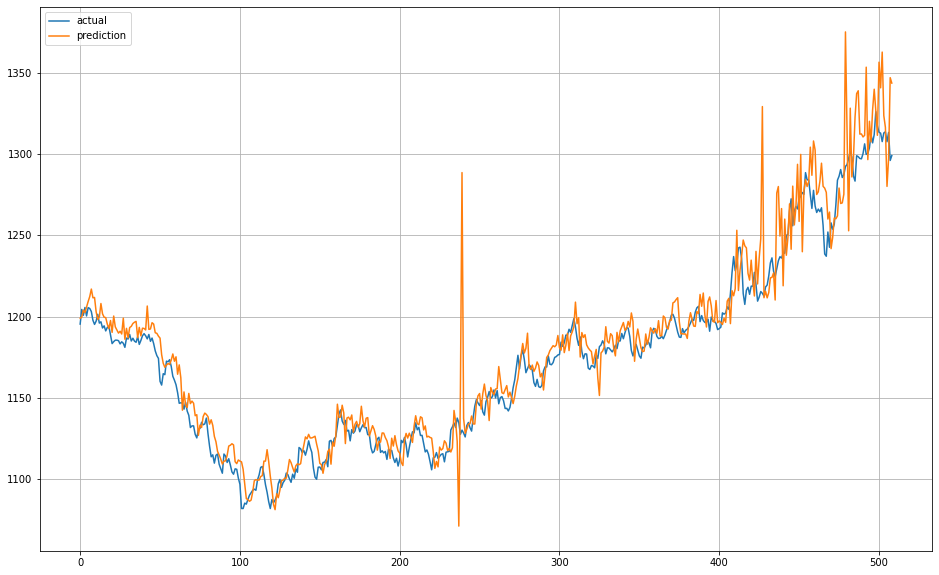

In [23]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 10))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.grid()
plt.show()